# Lending Club - Predict Interest Rates 

## Data Wrangling and EDA 

## A. Introduction 

The objective of this project is to develop a regression model to predict the interest rates on loans issued by LendingClub.
In order to predict the interest rates, we will focus on features related to the borrower's creditworthiness, 
loan characteristics, loan term, and loan amount. Zip code and other factors can be used to accurately predict the 
interest rate assigned to a loan. An accurate model will facilitate LendingClub improving its risk assessment processes 
and making more informed decisions regarding interest rates for future loan applications. This will allow the organization 
to cut its operational cost and increase its profit.

LendingClub is a leading peer-to-peer lending platform that connects borrowers with investors. Evaluating loan applications 
requires a rigorous process. Today, LendingClub assigns an interest rate to each loan by considering factors, such as 
credit score, employment history, loan amount, and loan purpose. This interest rate determination process, however, 
may involve subjective judgment, leading to potential inconsistencies and suboptimal decisions. By leveraging data and 
building a regression model, LendingClub can automate and enhance this process, resulting in improved loan pricing and 
risk management.


## 1. Sourcing and loading

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 

from statsmodels.graphics.api import abline_plot 

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 


###  Load the data

In [2]:
# Load the data. 
file='lc_loan.csv'
loan = pd.read_csv(file, dtype={'desc': str, 'verification_status_joint': str})


### Exploring the data

In [3]:
# Check out its appearance. 
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

This is what we can infer about the nature of the variables in the loan dataset:

--The first two column refer to ID. Column ID represents a unique number for each row while member ID represents ID 
given by lending club. We will use the ID column for analysis.
The remaining 70 columns represent different attributes of the borrower. The data types are mix of numerical and categorical 
data types. The column 'int_rate' is numerical variables representing the amount of interest rate each member was given 
when taking out a loan.

In [5]:
loan.shape

(887379, 74)

In [6]:
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

## EDA -- Cleaning, Transforming

These steps involve preparing the data for analysis, transforming it into a suitable format, and visualizing it to gain 
insights. Here is a general outline of these steps:

Cleaning the Data: Remove unnecessary columns, deal with duplicates and handle outliers

Transforming the Data: Data type conversion, Feature engineering

Visualizing the Data: Univariate analysis, Bivariate analysis, Multivariate analysis

###  Cleaning the Data

#### Handling missing Values

In [7]:
# Check for missing values
missing = pd.concat([loan.isnull().sum(), 100 * loan.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
...,...,...
total_pymnt,0,0.000000
total_pymnt_inv,0,0.000000
total_rec_prncp,0,0.000000
total_rec_int,0,0.000000


In [8]:
# Drop columns with missing values
def removeNulls(dataframe, axis =1, percent=0.8):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.6(60%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows removed\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns removed\t: ",len(colnames))
        
    print("\nRaw dataset rows,columns",ishape,"\nClean dataset rows,columns",df.shape)

    return df

In [9]:
# Remove columns where NA values  are more than or equal to 80%
loan_df = removeNulls(loan, axis =1,percent = 0.80)

Number of Columns removed	:  19

Raw dataset rows,columns (887379, 74) 
Clean dataset rows,columns (887379, 55)


In [10]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


After removing columns with more than 80% missing values, let's examine the remaining columns to determine the number of NaN entries. 
This analysis will provide us with an understanding of the extent to which the remaining data is missing.

In [11]:
# Analyze NaN entries
nan_analysis = loan_df.isnull().sum()
print("NaN Analysis:\n", nan_analysis)

NaN Analysis:
 id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   

In [12]:
#lloking at emp_title
loan_df['emp_title'].value_counts()

Teacher                                     13469
Manager                                     11240
Registered Nurse                             5525
Owner                                        5376
RN                                           5355
                                            ...  
Thomas J. Paul, Inc.                            1
Piggie Toes Preschool                           1
greystone park psychiatric hospital             1
Las Vegas Motropolitan Police Department        1
Manager Hotel Operations Oasis                  1
Name: emp_title, Length: 299271, dtype: int64

It looks like that the nan values are represented 'unemployed'. Let's investigate further.

In [13]:
# Filter data where empl_Title is "unemployed" or "Unemployed"
filtered_data = loan_df[loan_df['emp_title'].str.lower().str.contains('unemployed|other', na=False, regex=True)]

Based on the result above, we can assume that the Nan values represent unemployment.

In [14]:
#fill nan values of emp_title with unemployed
loan_df['emp_title'] = loan_df['emp_title'].fillna("Unemployed")

In [15]:
#fill nan values of title with other
loan_df['title'] = loan_df['title'].fillna('Other')

In [16]:
#replace the NaN values in the columns 'open_acc', 'delinq_2yrs', 'inq_last_6mths','annual_inc', 'pub_rec', last_credit_pull_d
#'revol_util', 'total_acc', 'acc_now_delinq', 'mths_since_last_major_derog' with their respective median values:
column=['open_acc', 'delinq_2yrs', 'inq_last_6mths','annual_inc', 'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq', 'mths_since_last_major_derog','last_credit_pull_d']
loan_df[column] = loan_df[column].fillna(loan_df[column].median())    


C:\Users\Sebuh\AppData\Local\Temp\ipykernel_272\3249437325.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan_df[column] = loan_df[column].fillna(loan_df[column].median())


Our focus for this project is historical data, thus the column next_pymnt_d is not relevant. We will drop the column.

In [17]:
loan_df.drop(['next_pymnt_d', 'policy_code', 'member_id'], axis=1, inplace=True)

####  Transforming the Data

Investigating emp_length column

In [18]:
loan_df['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [19]:
#convert emp_length to numbers only
#code copied from https://www.kaggle.com/code/dhananjayashok/lending-club-interest-rate-prediction-and-eda
def converter_emp_length(x):
    if x == "10+ years": return 10
    elif x == "2 years": return 2
    elif x == "< 1 year": return 0
    elif x == "3 years": return 3
    elif x == "1 year": return 1
    elif x == "4 years": return 4
    elif x == "5 years": return 5
    elif x == "6 years": return 6
    elif x == "7 years": return 7
    elif x == "8 years": return 8
    elif x == "9 years": return 9
    else:
        return 10 


In [20]:
# Get a list of the values of the int_rate variable, and the number of occurrences of each. 
loan['int_rate'].value_counts(dropna=False) 

10.99    34624
9.17     25720
15.61    25201
9.99     21553
7.89     20311
         ...  
18.72        1
24.59        1
22.64        1
14.28        1
17.44        1
Name: int_rate, Length: 542, dtype: int64

In [21]:
 loan_df['emp_length'] = loan_df['emp_length'].apply(converter_emp_length)

In [22]:
loan_df['emp_length'].value_counts()

10    336394
2      78870
0      70605
3      70026
1      57095
5      55704
4      52529
7      44594
8      43955
6      42950
9      34657
Name: emp_length, dtype: int64

In [23]:
#convert the "issue_d" column to the datetime64
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])

In [24]:
#looking into mths_since_last_delinq
loan_df['mths_since_last_delinq'].unique() 

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.,
        88.,  87., 122.,  91., 146., 134., 114.,  99.,  93., 127., 101.,
        94., 102., 129., 113., 139., 131., 156., 143., 109., 119., 149.,
       118., 130., 148., 126.,  90., 141., 116., 100., 152.,  98.,  92.,
       108., 133., 104., 111., 105., 170., 124., 136., 180., 188., 140.,
       151., 159., 121., 123., 157., 112., 154., 17

In [25]:
# Replace NaN values with the median value
median_value = loan_df['mths_since_last_delinq'].median()
loan_df['mths_since_last_delinq'].fillna(median_value, inplace=True)

In [26]:
# Convert the column to numeric
loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].astype(str).str.replace('.', '').astype(int)



C:\Users\Sebuh\AppData\Local\Temp\ipykernel_272\1156362564.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].astype(str).str.replace('.', '').astype(int)


In [27]:
loan_df['mths_since_last_delinq'].dtype 

dtype('int32')

In [28]:
#Extract numeric values from the "term" column and add new column 'term_in_month'
loan_df['term_in_month'] = loan_df['term'].str.extract('(\d+)').astype(int)

In [29]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_in_month
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Unemployed,...,171.62,Jan-2016,0.0,44.0,INDIVIDUAL,0.0,NaN,NaN,NaN,36
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,119.66,Sep-2013,0.0,44.0,INDIVIDUAL,0.0,NaN,NaN,NaN,60
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Unemployed,...,649.91,Jan-2016,0.0,44.0,INDIVIDUAL,0.0,NaN,NaN,NaN,36
3,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Jan-2015,0.0,44.0,INDIVIDUAL,0.0,NaN,NaN,NaN,36
4,1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,67.79,Jan-2016,0.0,44.0,INDIVIDUAL,0.0,NaN,NaN,NaN,60


In [30]:
##convert the "earliest_cr_line" column to the datetime64
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])

In [31]:
# Calculate the average value of earlies credit line column
average_value = loan_df['earliest_cr_line'].mean()

# Fill NaN values with the average
loan_df['earliest_cr_line'].fillna(average_value, inplace=True)

In [32]:
# Calculate the average value of 'last_credit_pull_d' column
most_frequent_value = loan_df['last_credit_pull_d'].mode().iloc[0]

# Fill NaN values with the average
loan_df['last_credit_pull_d'].fillna(most_frequent_value, inplace=True)


There are 3 columns ('tot_cur_bal', 'total_rev_hi_lim' and tot_coll_amt') with exacat same amount of misssing values
Next, we will conduct analysis to identify if these three columns have missing values in the same rows and if they share a common pattern of missing data.

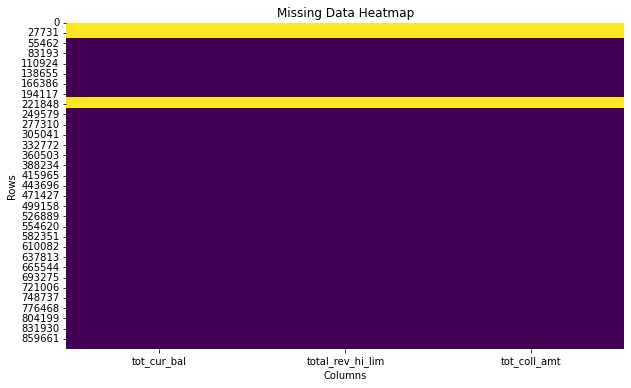

In [33]:
# Check the number of missing values in each column
columns = ['tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt']

# Create a subset DataFrame with the selected columns
subset_df = loan_df[columns]

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(subset_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [34]:
# Drop rows with missing values in all three columns
loan_df.dropna(subset=['tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt'], how='all', inplace=True)


In [35]:
# Calculate the average value of 'last_pymnt_d' column
most_frequent_value = loan_df['last_pymnt_d'].mode().iloc[0]

# Fill NaN values with the average
loan_df['last_pymnt_d'].fillna(most_frequent_value, inplace=True)

In [36]:
#conduct analysis to see if we still have missing values in our dataset
nan_analysis = loan_df.isnull().sum()
print("NaN Analysis:\n", nan_analysis)

NaN Analysis:
 id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                   

# 2.0 EDA -- Visualizing the Data

Choosing a dependent variable

Now, we will pick a dependent variable for our regression analysisa i.e. the variable whose values will be predicted. 

'int_rate' is good a candidate. Next, we will check it out. by making a histogram of it to get an idea of 
the center and spread of its values. 

### Univariate analysis

Plot a histogram visualize the distribution of interest rates. This will help us understand the shape of the distribution and identify any potential outliers or unusual patterns.

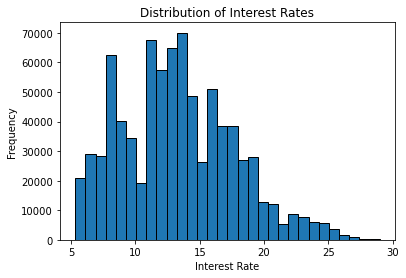

In [37]:
plt.hist(loan_df['int_rate'], bins=30, edgecolor='black')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates')
plt.show()

lowest interest rate given by Lending Club is around 6% while the highest is 28%.

we will Start by examining basic statistics of the loan interest rates, such as mean, median, 
mode, minimum, maximum, and standard deviation. This will provide an overview of the central tendency, spread,
and distribution of interest rates.

### Descriptive Statistics

In [38]:
# descriptive statistics for loan interest rate
int_rate_stats = loan_df['int_rate'].describe()

# Print the statistics
print(int_rate_stats)

count    817103.000000
mean         13.304362
std           4.407272
min           5.320000
25%           9.990000
50%          12.990000
75%          16.290000
max          28.990000
Name: int_rate, dtype: float64


    Mean: The mean interest rate is approximately 13.25%.
    Median: The median interest rate is approximately 12.99%.

Both the mean and median provide an estimate of the central value around which the interest rates in the dataset cluster. 
The mean represents the average interest rate, while the median represents the middle value of the sorted interest rates.

### Distribution of the interest

In [39]:
from scipy.stats import skew

# Calculate the skewness of interest rate
interest_rate_skew = skew(loan_df['int_rate'])

print("Skewness of Interest Rate:", interest_rate_skew)

Skewness of Interest Rate: 0.43079606926987357


The skewness value of 0.431 indicates that the distribution of the interest rate variable is slightly positively skewed. 
This means that the distribution has a longer tail on the right side and the majority of the interest rate values are 
concentrated towards the lower end.

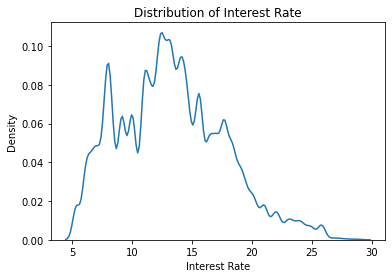

In [40]:
# Plot the density plot of interest rate
sns.kdeplot(loan_df['int_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

### Bivariate analysis

#### Correlation map

correlation heatmaps are a useful tool for visualizing the relationships between numerical columns in a our dataset. They provide a quick overview of the linear correlations between variables and can help identify features that are strongly correlated with the target variable.

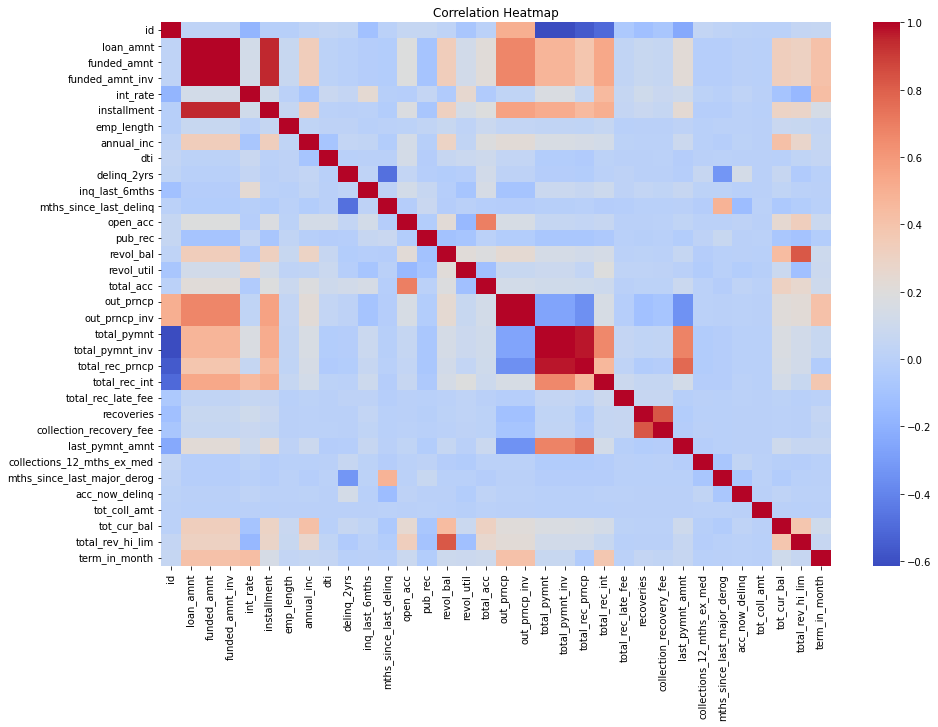

In [41]:
# Compute the correlation matrix
corr_matrix = loan_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


From the plot above, we can conclude the following:
Variables that have correlation with interest rate are: term_in_month, total_rev_hi_lim, total_rec_int, and annual_inc. However, these correlations are not very strong.

In our case,  the correlation between numerical variables is not strong when predicting interst rate. In such cases, it's worth exploring the relationships between categorical features and the target variable, i.e. interest rate, as they might contain important predictive information.
    

Now, we will explore the relationship between two variables to uncover any correlations or trends.

To investigate the relationship between interest rate and length of employment, we will create a line plot that shows the average interest rate for each length of employment category. 


### Line Plot

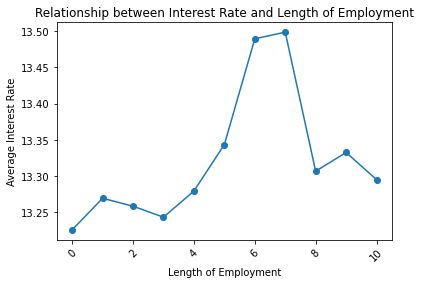

In [42]:
avg_interest_rate = loan_df.groupby('emp_length')['int_rate'].mean()

# Create a line plot
plt.plot(avg_interest_rate.index, avg_interest_rate.values, marker='o')
plt.xlabel('Length of Employment')
plt.ylabel('Average Interest Rate')
plt.title('Relationship between Interest Rate and Length of Employment')
plt.xticks(rotation=45)
plt.show()

This is an insightful observation. The non-linear relationship between interest rate and employment length, with a drop 
in average interest rate for individuals working 8 to 10 years, could indeed be attributed to the perception of stability 
and lower risk associated with longer employment tenures. One can assume that lenders may view individuals with a longer job history as more 
reliable borrowers, resulting in a lower interest rate.

Regarding the lower interest rate for individuals who have worked less than four years, it's common for lenders to offer 
lower interest rates for startup loans or loans for new businesses to support their growth and increase the likelihood 
of successful repayment. This lower interest rate may incentivize entrepreneurs and small business owners to take out 
loans to help establish and develop their ventures.

This analysis highlights the importance of considering the context and industry-specific factors when interpreting 
relationships between variables. Understanding the underlying reasons behind observed patterns can provide valuable 
insights into the dynamics of the lending market and borrower characteristics.


### Violin plot 

Next we will generate a violin plot to visualize the distribution of interest rates based on homeownership status. 
The plot also differentiates the distribution by application type. 

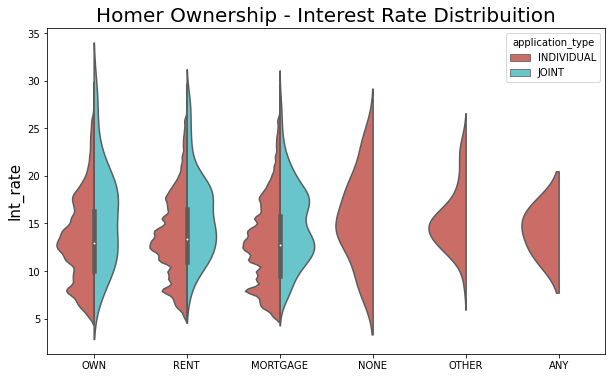

In [43]:
#Homeownership and interest rate

plt.figure(figsize = (10,6))

g = sns.violinplot(x="home_ownership",y="int_rate",data=loan_df,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Interest Rate Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Int_rate", fontsize=15)

plt.show()



In [44]:
# Calculate descriptive statistics for interest rates based on homeownership
summary_stats = loan_df.groupby('home_ownership')['int_rate'].describe()

# Print the summary statistics
print(summary_stats)

                   count       mean       std    min      25%    50%     75%  \
home_ownership                                                                 
ANY                  3.0  14.233333  2.449333  11.67  13.0750  14.48  15.515   
MORTGAGE        412331.0  13.019900  4.437919   5.32   9.4900  12.69  15.800   
NONE                42.0  15.491905  4.503588   7.62  12.6125  14.82  18.750   
OTHER               45.0  15.386000  3.157943   8.90  13.1100  15.31  16.290   
OWN              82039.0  13.327503  4.451220   5.32   9.9900  12.99  16.290   
RENT            322643.0  13.661431  4.329884   5.32  10.9900  13.33  16.550   

                  max  
home_ownership         
ANY             16.55  
MORTGAGE        28.99  
NONE            24.89  
OTHER           23.63  
OWN             28.99  
RENT            28.99  


The "MORTGAGE" category has the highest count of observations (412,331) and a mean interest rate of approximately 13.02%. 
It also has the highest standard deviation of around 4.44, indicating a wider spread of interest rates within this category.

The "RENT" category has the second-highest count of observations (322,643) and a slightly higher mean interest rate 
of around 13.66% compared to the "MORTGAGE" category. The standard deviation is also relatively high at approximately 4.33.

The "OWN" category has a lower count of observations (82,039) compared to "MORTGAGE" and "RENT" categories. 
It has a slightly lower mean interest rate of around 13.33% and a similar standard deviation of approximately 4.45.

The "NONE" and "OTHER" categories have smaller counts of observations (42 and 45, respectively) compared to the other 
categories. They have relatively higher mean interest rates of around 15.49% and 15.39%, respectively. The standard 
deviations for these categories are also smaller compared to "MORTGAGE" and "RENT".

### Box Plot

Lending club (LC) collects demographic and financial information from prospective borrowers and utilizes this information to assign a grade to each borrower. The LC grade serves as an indication of the borrower's creditworthiness and is a crucial factor for prospective lenders in assessing the risk associated with lending to that borrower.
Higher grades indicating lower credit risk and lower grades indicating higher credit risk.

Next we will investigate the relationship between grade and interst rate

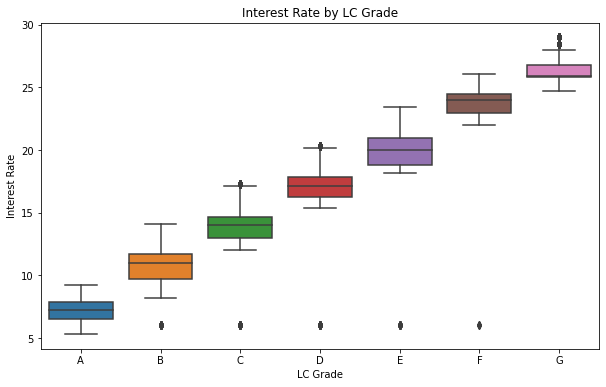

In [45]:
#Create a box plot of interest rate grouped by LC grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_df, order=sorted(loan_df['grade'].unique()))
plt.title('Interest Rate by LC Grade')
plt.xlabel('LC Grade')
plt.ylabel('Interest Rate')
plt.show()

The box plot shows that Grade A has the lowest interest rates among all the LC grades, while the interest rates 
generally increase as you move from Grade B to Grade G. Grade G tends to have the highest interest rates assigned to it.

Lending Club assigns lower interest rates to borrowers with higher LC grades (Grade A) as they are considered more 
creditworthy. As the LC grade decreases, the interest rates increase, indicating a higher perceived risk associated 
with those borrowers.

### Multivariate analysis

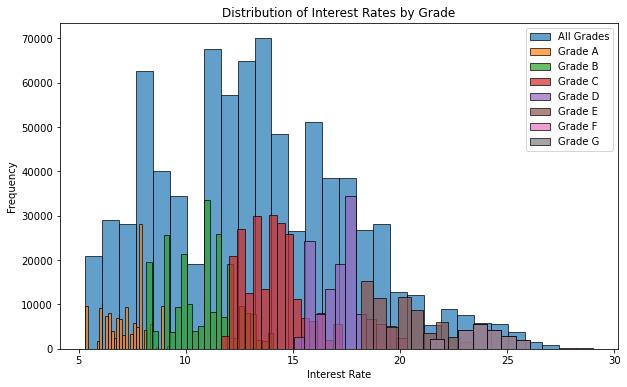

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(loan_df['int_rate'], bins=30, edgecolor='black', alpha=0.7, label='All Grades')
plt.hist(loan_df.loc[loan_df['grade'] == 'A', 'int_rate'], bins=30, edgecolor='black', alpha=0.7, label='Grade A')
plt.hist(loan_df.loc[loan_df['grade'] == 'B', 'int_rate'], bins=30, edgecolor='black', alpha=0.7, label='Grade B')
plt.hist(loan_df.loc[loan_df['grade'] == 'C', 'int_rate'], bins=30, edgecolor='black', alpha=0.7, label='Grade C')
plt.hist(loan_df.loc[loan_df['grade'] == 'D', 'int_rate'], bins=30, edgecolor='black', alpha=0.7, label='Grade D')
plt.hist(loan_df.loc[loan_df['grade'] == 'E', 'int_rate'], bins=30, edgecolor='black', alpha=0.7, label='Grade E')
plt.hist(loan_df.loc[loan_df['grade'] == 'F', 'int_rate'], bins=30, edgecolor='black', alpha=0.7, label='Grade F')
plt.hist(loan_df.loc[loan_df['grade'] == 'F', 'int_rate'], bins=30, edgecolor='black', alpha=0.7, label='Grade G')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates by Grade')
plt.legend()
plt.show()


It is clear that interest rate is related to the grade level assigned by Lending Club.

Now, that we have determined the relationship between various features and our target value interest rate, We could fit a regression model with the variable "int_rate" as the dependent variable and other varialbes as independent variables.

Next Step:

    1. pre-process and train the data to normalize and standardize all the features in our data
    
    2. create a validation set
    
    3. build our model. 